In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('C:\Code'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Code\fifa.ipynb
C:\Code\fifa.png
C:\Code\fifa2022.csv.csv
C:\Code\FIFAWORLDCUP.ipynb
C:\Code\fifa_world_cup_2022_tweets.csv
C:\Code\main.py
C:\Code\NLP 6.py
C:\Code\NLP LAB 1 & 2.ipynb
C:\Code\NLP LAB 3 (2).ipynb
C:\Code\NLP LAB 4.ipynb
C:\Code\NLP LAB 7 Text Summarization.ipynb
C:\Code\nlp5_Named_Entity_Recognition.ipynb
C:\Code\NLP_8.ipynb
C:\Code\NLP_Mini Project_Report.pdf
C:\Code\Research Paper_Sentiment Analysis of FIFA World Cup 2022 Twitter Reviews.pdf


In [33]:
import pandas as pd

# Corrected file path
file_path = 'C:/Code/fifa_world_cup_2022_tweets.csv'

# Read the CSV file
df = pd.read_csv(file_path)
df['Date Created'] = pd.to_datetime(df['Date Created'], format='%Y-%m-%d %H:%M:%S%z')

#df = pd.read_csv("C:\Code\fifa_world_cup_2022_tweets.csv")

In [34]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [35]:
import pandas as pd

# Assuming 'Date Created' is the column containing date/time information
# Try parsing datetime with inferred format and handling timezones
df['Date Created'] = pd.to_datetime(df['Date Created'], errors='coerce', utc=True)

In [36]:
df.shape

(22524, 6)

In [37]:
df.isnull( ).sum( )

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64

In [38]:
df['Source of Tweet'].value_counts().head(10)

Source of Tweet
Twitter for iPhone          9507
Twitter for Android         6820
Twitter Web App             4505
TweetDeck                    386
Twitter for iPad             240
Qualtrics Social Connect     165
Hootsuite Inc.               146
Buffer                        71
Instagram                     62
Tweetbot for iΟS              52
Name: count, dtype: int64

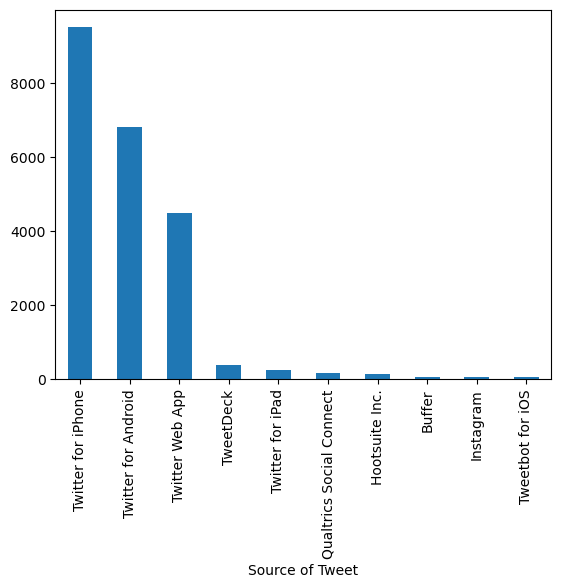

In [39]:
source_t =  df['Source of Tweet'].value_counts()
source_t.head(10).plot.bar()

plt.show()

In [40]:
most_liked = df.sort_values(by=['Number of Likes'], ascending=False)
most_liked.head(10)

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
1287,1287,2022-11-20 19:39:11+00:00,316867,Twitter for iPhone,I can’t express my gratitude and happiness for...,positive
17359,17359,2022-11-20 12:41:31+00:00,31517,Twitter Media Studio,Football Legend Eric Cantona reminds football ...,neutral
21267,21267,2022-11-20 06:17:00+00:00,20016,Twitter Web App,⚽️ #BitKeep FootBall Carnival Main Event is co...,positive
528,528,2022-11-20 22:20:55+00:00,5847,TweetDeck,WATCH: BTS's #Jungkook Performs At #WorldCup20...,neutral
20073,20073,2022-11-20 09:05:12+00:00,5555,Twitter for iPhone,The 👑 Leo with Louis Vuitton 💧 #WorldCup2022 h...,positive
15332,15332,2022-11-20 14:57:02+00:00,5484,Twitter Web App,Need them at the World Cup opening ceremony 😮\...,neutral
20101,20101,2022-11-20 09:02:09+00:00,5430,TweetDeck,WATCH: #BTS's #Jungkook Shares His Support For...,neutral
212,212,2022-11-20 23:06:08+00:00,3172,Twitter Media Studio,"""It's Palestine...""\n\nLebanese fans refuse to...",negative
1635,1635,2022-11-20 19:00:00+00:00,2428,Sprinklr Publishing,".@reymysterio, @fightbobby, @BiancaBelairWWE a...",neutral
5761,5761,2022-11-20 16:23:30+00:00,2370,Twitter for Android,Qatar's Goalkeeper 😂\n\n#WorldCup2022 https://...,neutral


In [41]:
df.iloc[1287].Tweet

'I can’t express my gratitude and happiness for my participation in the biggest event of all times the World Cup in my country #Qatar with the talented Jung kook , thank you for everything\n#WorldCup \n#WorldCup2022 \n#JUNGKOOKxFIFA \n#JungkookAtFIFAWorldCup \n@BTS_twt \n@bts_bighit https://t.co/PebpCj9uN2'

In [42]:
df.iloc[1].Tweet

'Amazing @CanadaSoccerEN  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8'

In [43]:
df.iloc[212].Tweet

'"It\'s Palestine..."\n\nLebanese fans refuse to be interviewed by an Israeli TV reporter after he said that he is from \'Israel\' at #WorldCup2022 in Qatar. https://t.co/shdWDn4ZvC'

In [44]:
tfidf = TfidfVectorizer(max_features=25000)  # You can adjust max_features
X = tfidf.fit_transform(df['Tweet'])
y = df['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy (just for reference)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model: {accuracy}")


Accuracy of the model: 0.7227524972253052


In [7]:
import pandas as pd

# Assuming you've already read the CSV file into the DataFrame df
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

# Calculate the number of positive and negative comments
positive_count = (df['Sentiment'] == 'positive').sum()
negative_count = (df['Sentiment'] == 'negative').sum()

# Print the counts
print(f"Number of Positive Comments: {positive_count}")
print(f"Number of Negative Comments: {negative_count}")


Number of Positive Comments: 8489
Number of Negative Comments: 5784


# Sentiment Analysis using Machine Learning


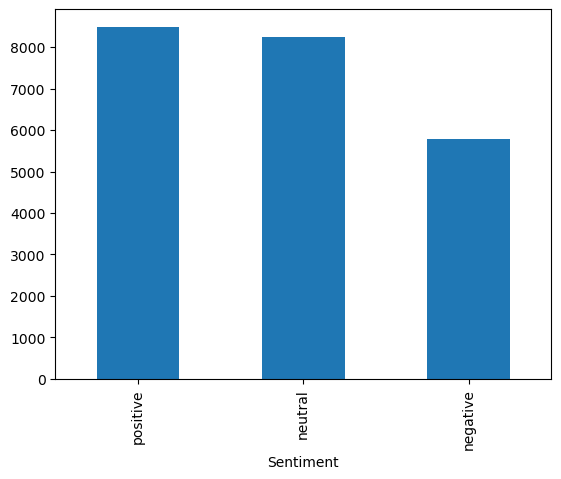

In [45]:
sentiment =  df['Sentiment'].value_counts()
sentiment.head().plot.bar()

plt.show()

In [46]:
df['Date Created'] = pd.to_datetime(df['Date Created']).dt.time
df['Date Created']

0        23:59:21
1        23:59:01
2        23:58:41
3        23:58:33
4        23:58:28
           ...   
22519    00:00:21
22520    00:00:03
22521    00:00:01
22522    00:00:00
22523    00:00:00
Name: Date Created, Length: 22524, dtype: object

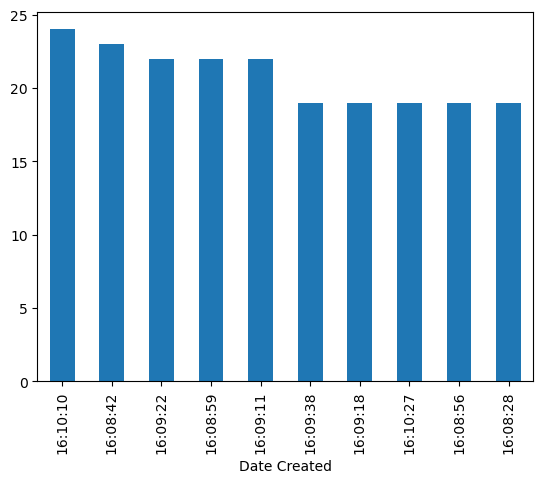

In [47]:
ppd =  df['Date Created'].value_counts()
ppd.head(10).plot.bar()

plt.show()

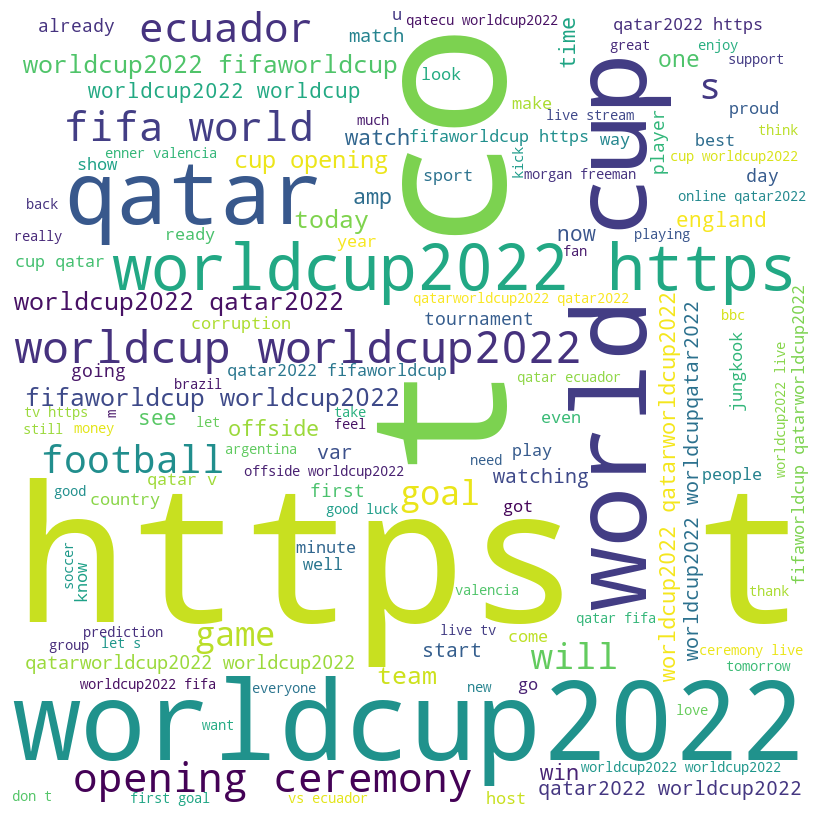

In [48]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Read your CSV file into a DataFrame 
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the 'Tweet' column in the DataFrame
for val in df['Tweet']:
    # Typecast each value to string
    val = str(val)
    
    # Split the value
    tokens = val.lower().split()  # Convert to lowercase and split directly
    
    # Join tokens to form a string
    comment_words += " ".join(tokens) + " "

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image                      
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Date Created
2022-11-20 16:10:10+00:00    17
2022-11-20 16:10:02+00:00    13
2022-11-20 16:09:32+00:00    13
2022-11-20 16:09:11+00:00    12
2022-11-20 16:08:48+00:00    12
Name: count, dtype: int64

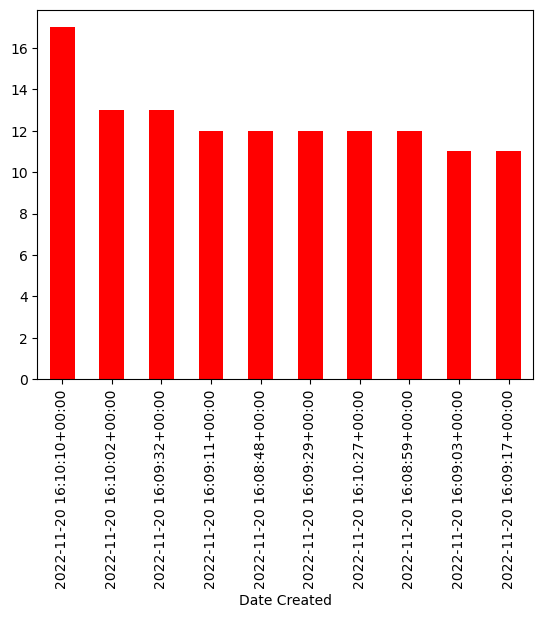

In [49]:
neg_tweets = df[df['Sentiment'] == 'negative']
neg_tweets = neg_tweets['Date Created'].value_counts()
neg_tweets.head(10).plot.bar(color=['red'])

neg_tweets.head()


In [9]:
import pandas as pd
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')
# Assuming you've already read the CSV file into the DataFrame df
neg_tweets = df[df['Sentiment'] == 'negative']
neg_tweets = neg_tweets['Date Created'].value_counts()

# Now you can proceed with creating the DataFrame negdf
negdf = pd.DataFrame()
negdf['negative'] = neg_tweets

# Continue with the rest of your code
postweets = df[df['Sentiment'] == 'positive']
posdf = pd.DataFrame()

posdf['positive'] = postweets['Date Created'].value_counts()
f_df = pd.DataFrame()

f_df = pd.merge(negdf, posdf, left_index=True, right_index=True)



In [51]:
f_df = f_df.sort_index(ascending=True)
f_df

,negative,positive
Date Created,,
2022-11-20 05:27:09+00:00,1,1
2022-11-20 05:57:24+00:00,1,1
2022-11-20 06:55:09+00:00,1,1
2022-11-20 07:20:04+00:00,1,1
2022-11-20 07:37:27+00:00,1,1
...,...,...
2022-11-20 20:03:55+00:00,1,1
2022-11-20 22:00:01+00:00,1,2
2022-11-20 22:15:52+00:00,1,1


<Axes: title={'center': 'positive vs negative tweets'}, xlabel='Date Created'>

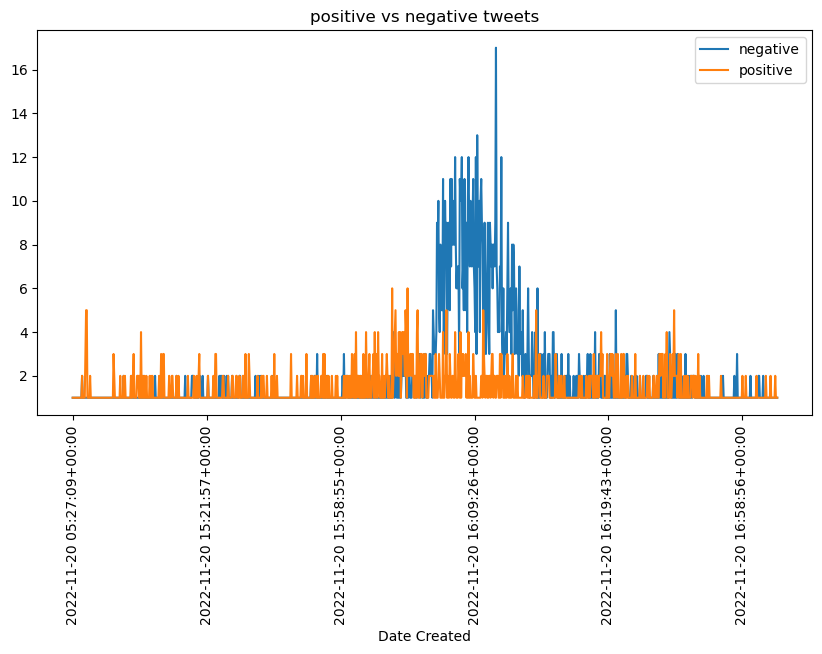

In [52]:
f_df.plot(figsize=(10, 5), rot=90, title="positive vs negative tweets")